In [18]:
## importing important liraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid") # used for the visualisation of the data not for data processing

In [19]:
#load the data sets
df = pd.read_csv("Unemployment in India.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# getting the top 5 values of the data
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [21]:
#understand the information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [22]:
#describes about the data present int he data set
df.describe()


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [23]:
df.columns = df.columns.str.strip()
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [24]:
# it gives how many null values in the data 
df.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [26]:
df.dropna(inplace=True)
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [29]:
#Convert Date Column
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0     2019-05-31
1     2019-06-30
2     2019-07-31
3     2019-08-31
4     2019-09-30
         ...    
749   2020-02-29
750   2020-03-31
751   2020-04-30
752   2020-05-31
753   2020-06-30
Name: Date, Length: 740, dtype: datetime64[ns]

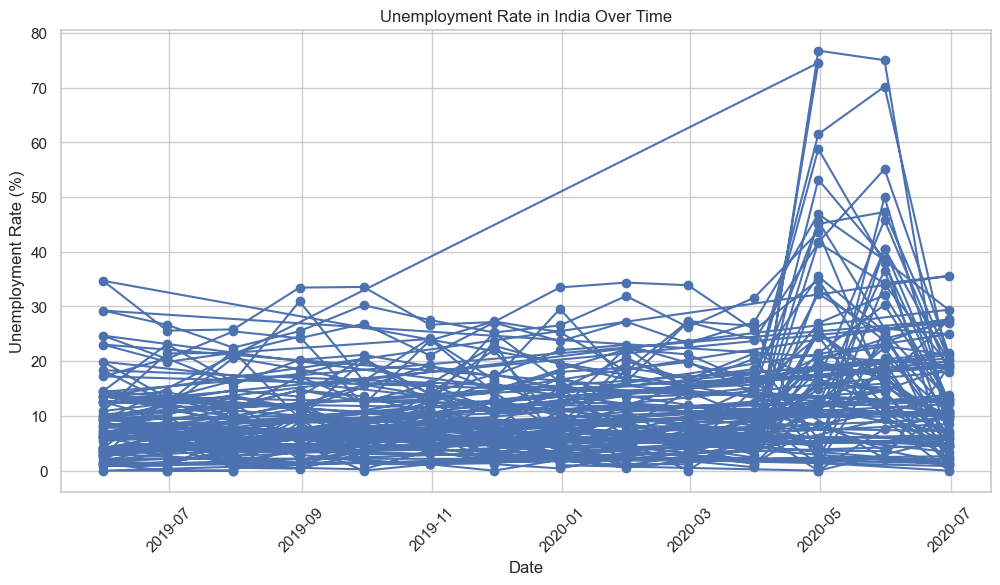

In [30]:
#Unemployment Rate Over Time in the grap formart (line graph)
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'], marker='o')
plt.title("Unemployment Rate in India Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.show()


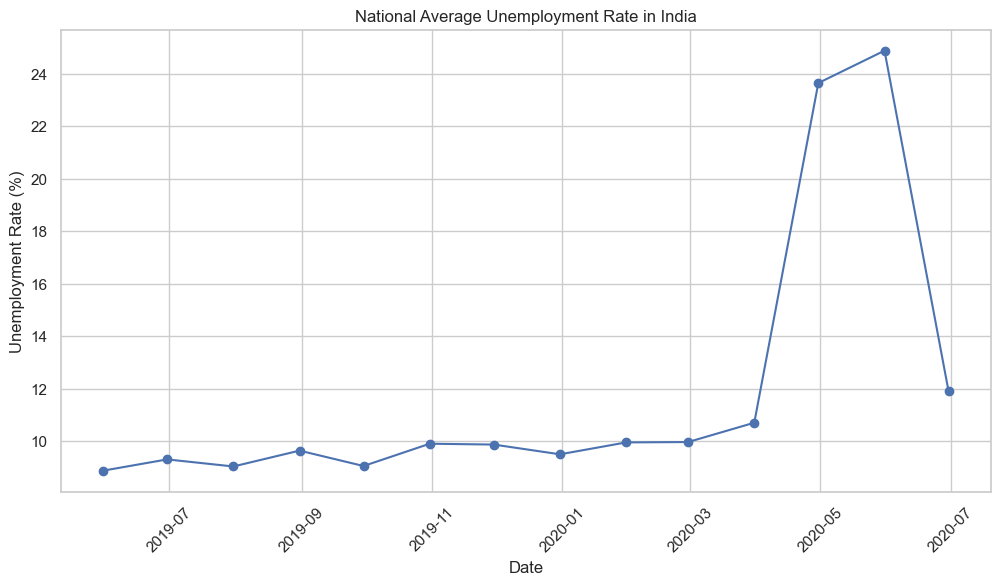

In [34]:
# this graph also say the same thing as the above one but it shows it clearly
national_avg = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
plt.figure(figsize=(12,6))
plt.plot(national_avg.index, national_avg.values, marker='o')
plt.title("National Average Unemployment Rate in India")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.show()

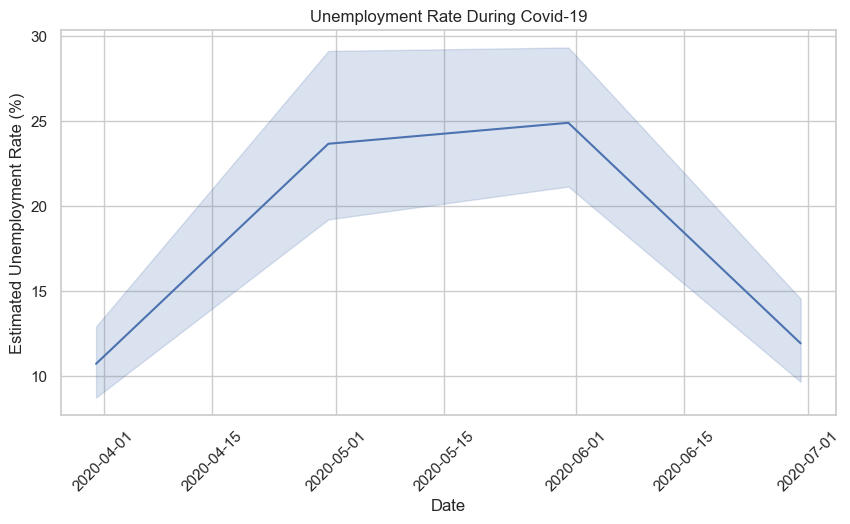

In [36]:
# impact of the covid 19
covid_period = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2020-12-31')]

plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=covid_period)
plt.title("Unemployment Rate During Covid-19")
plt.xticks(rotation=45)
plt.show()


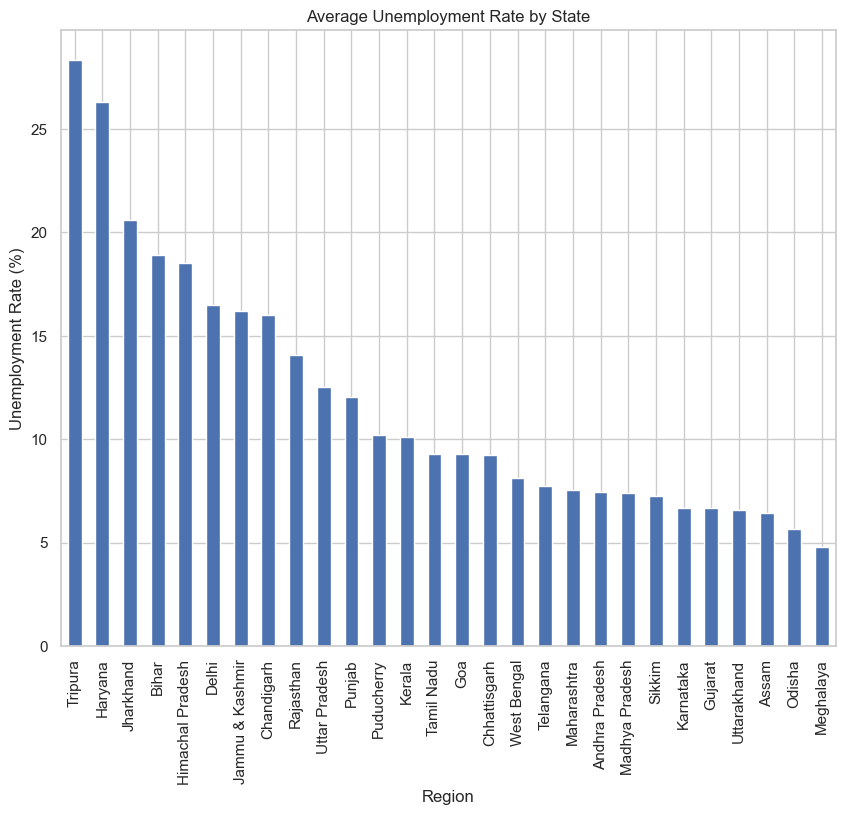

In [37]:
# State-wise Unemployment Analysis

state_avg = df.groupby("Region")["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,8))
state_avg.plot(kind='bar')
plt.title("Average Unemployment Rate by State")
plt.ylabel("Unemployment Rate (%)")
plt.show()


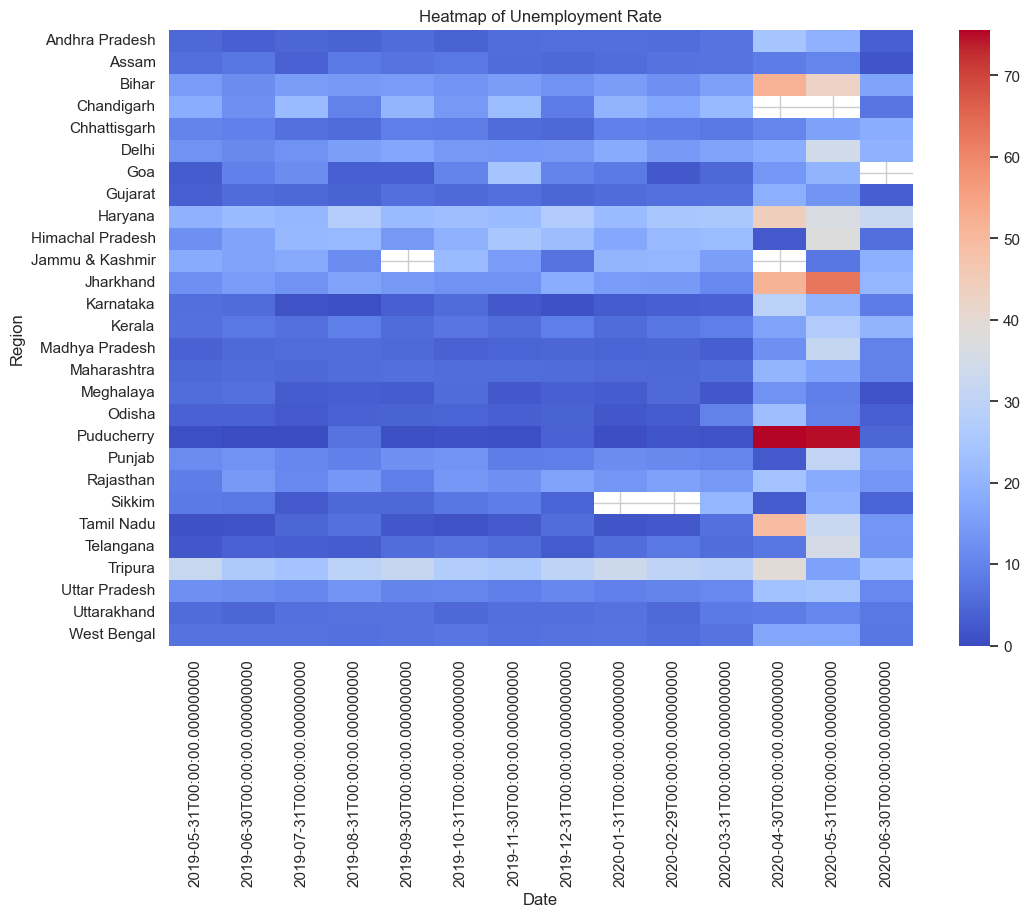

In [39]:
# heat map of the unemployment rate for state wise
pivot_table = df.pivot_table(
    values='Estimated Unemployment Rate (%)',
    index='Region',
    columns='Date'
)

plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap='coolwarm')
plt.title("Heatmap of Unemployment Rate")
plt.show()


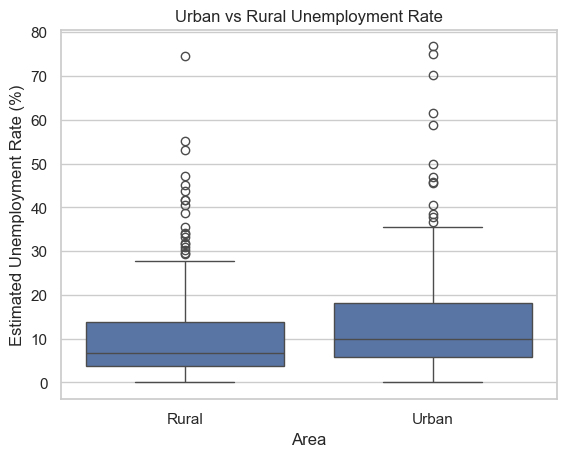

In [41]:
#urban vs rural unemploymenet rate 
sns.boxplot(x='Area', y='Estimated Unemployment Rate (%)', data=df)
plt.title("Urban vs Rural Unemployment Rate")
plt.show()


## key insights from the above project 
1. Pre-Covid Employment Stability
Before the Covid-19 pandemic, unemployment rates across most Indian states remained relatively stable with only minor fluctuations. This indicates a normally functioning labor market without major economic disruptions.

2. Significant Impact of Covid-19 Lockdowns

A sharp increase in unemployment rates is observed during April and May 2020, coinciding with the nationwide lockdown. The sudden pause in economic activity resulted in widespread job losses, especially in the informal sector.

3. State-Wise Variation in Unemployment

The analysis shows clear differences in unemployment rates across states. Some regions consistently experienced higher unemployment levels than others, highlighting regional economic imbalances.

4. National Trend Reflects Pandemic Effect

The national average unemployment trend displays a significant spike during the Covid period, confirming that the pandemic had a widespread impact across the country.

5. Severe Impact on the Most Affected States

The top five most affected states recorded extremely high unemployment rates during the lockdown period. States with greater dependence on service-based and informal employment were more vulnerable to the economic shutdown.

6. Gradual Post-Lockdown Recovery

Following the easing of lockdown restrictions, unemployment rates began to decline gradually. However, the recovery was slow and unemployment levels did not immediately return to pre-pandemic values.

7. Long-Term Effects of Short-Term Shock

Although unemployment increased sharply during the lockdown, the recovery process took considerably longer. This highlights the long-term effects of sudden economic shocks on employment.

8. Importance of Data Visualization

Line plots, bar charts, and state-wise comparisons helped clearly identify trends, spikes, and regional patterns. Visualization played a crucial role in understanding and communicating the findings.